In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (12, 7)

In [3]:
df_raw = pd.read_excel("cleaned_data/cleaned_table_10a.xlsx")

df_raw.head(250)

,Age Group,Referrals Received,Entered Treatment,Completing Treatment,Referrals Received - Male,Entered Treatment - Male,Completing Treatment - Male,Referrals Received - Female,Entered Treatment -Female,Completing Treatment - Female
0,<16,682,172,42,182,58,14,392,112,26
1,16 to 17,20516,11238,4290,6039,3215,1161,14173,7915,3107
2,18 to 35,574542,341571,186651,199281,114100,60758,365576,224615,124857
3,36 to 64,591976,406092,244693,222615,151095,90654,361265,252126,152942
4,65+,79477,56592,33205,25147,17919,10528,53531,38361,22535


In [4]:
df = df_raw.copy()

df["Entry_Rate"] = df["Entered Treatment"] / df["Referrals Received"] * 100
df["Completion_Rate"] = df["Completing Treatment"] / df["Entered Treatment"] * 100
df["Throughput"] = df["Completing Treatment"] / df["Referrals Received"] * 100

df[["Age Group", "Referrals Received", "Entered Treatment", "Entry_Rate", "Completing Treatment",
    "Completion_Rate", "Throughput"]].head()

,Age Group,Referrals Received,Entered Treatment,Entry_Rate,Completing Treatment,Completion_Rate,Throughput
0,<16,682,172,25.219941,42,24.418605,6.158358
1,16 to 17,20516,11238,54.776760,4290,38.174052,20.910509
2,18 to 35,574542,341571,59.451006,186651,54.644862,32.486920
3,36 to 64,591976,406092,68.599403,244693,60.255558,41.334953
4,65+,79477,56592,71.205506,33205,58.674371,41.779383


In [4]:
# National totals
national_received = df["Referrals Received"].sum()
national_entered = df["Entered Treatment"].sum()
national_completed = df["Completing Treatment"].sum()

national_entry_rate = national_entered / national_received * 100
national_completion_rate = national_completed / national_entered * 100

print("National referrals received:", int(national_received))
print("National entered treatment:", int(national_entered))
print("National completed treatment:", int(national_completed))
print(f"National Entry Rate: {national_entry_rate:.2f}%")
print(f"National Completion Rate: {national_completion_rate:.2f}%")

National referrals received: 1267193
National entered treatment: 815665
National completed treatment: 468881
National Entry Rate: 64.37%
National Completion Rate: 57.48%


/tmp/ipykernel_7381/745785783.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


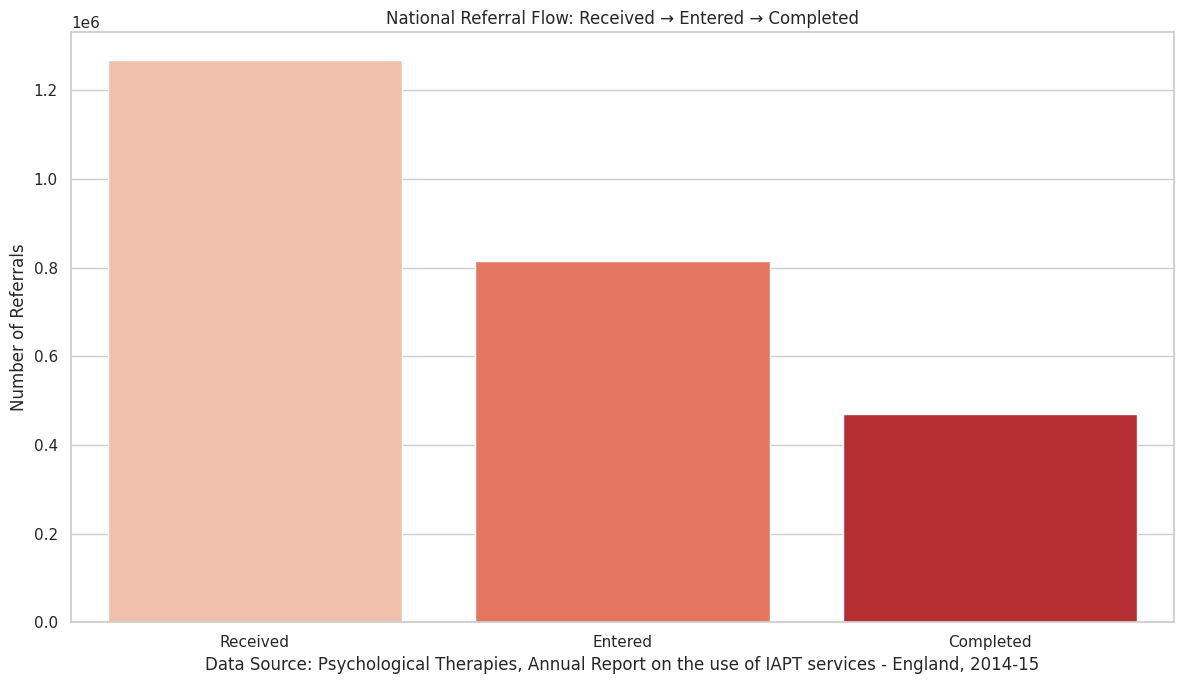

In [5]:
plt.figure()
sns.barplot(
    x=["Received", "Entered", "Completed"],
    y=[national_received, national_entered, national_completed],
    palette="Reds"
)
plt.title("National Referral Flow: Received → Entered → Completed")
# Add Reference to Data Source
plt.xlabel("Data Source: Psychological Therapies, Annual Report on the use of IAPT services - England, 2014-15")
plt.ylabel("Number of Referrals")
plt.tight_layout()
plt.show()

In [6]:
age_summary = df.groupby("Age Group").agg({
    "Referrals Received": "sum",
    "Entered Treatment": "sum",
    "Completing Treatment": "sum"
})

age_summary["Entry_Rate"] = age_summary["Entered Treatment"] / age_summary["Referrals Received"] * 100
age_summary["Completion_Rate"] = age_summary["Completing Treatment"] / age_summary["Entered Treatment"] * 100
age_summary["Referrals Received(%)"] = age_summary["Referrals Received"] / national_received * 100  
age_summary

,Referrals Received,Entered Treatment,Completing Treatment,Entry_Rate,Completion_Rate,Referrals Received(%)
Age Group,,,,,,
16 to 17,20516,11238,4290,54.776760,38.174052,1.619011
18 to 35,574542,341571,186651,59.451006,54.644862,45.339739
36 to 64,591976,406092,244693,68.599403,60.255558,46.715536
65+,79477,56592,33205,71.205506,58.674371,6.271894
<16,682,172,42,25.219941,24.418605,0.053820


/tmp/ipykernel_7381/3051592054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_summary.reset_index(), x="Age Group", y="Referrals Received", palette="viridis")


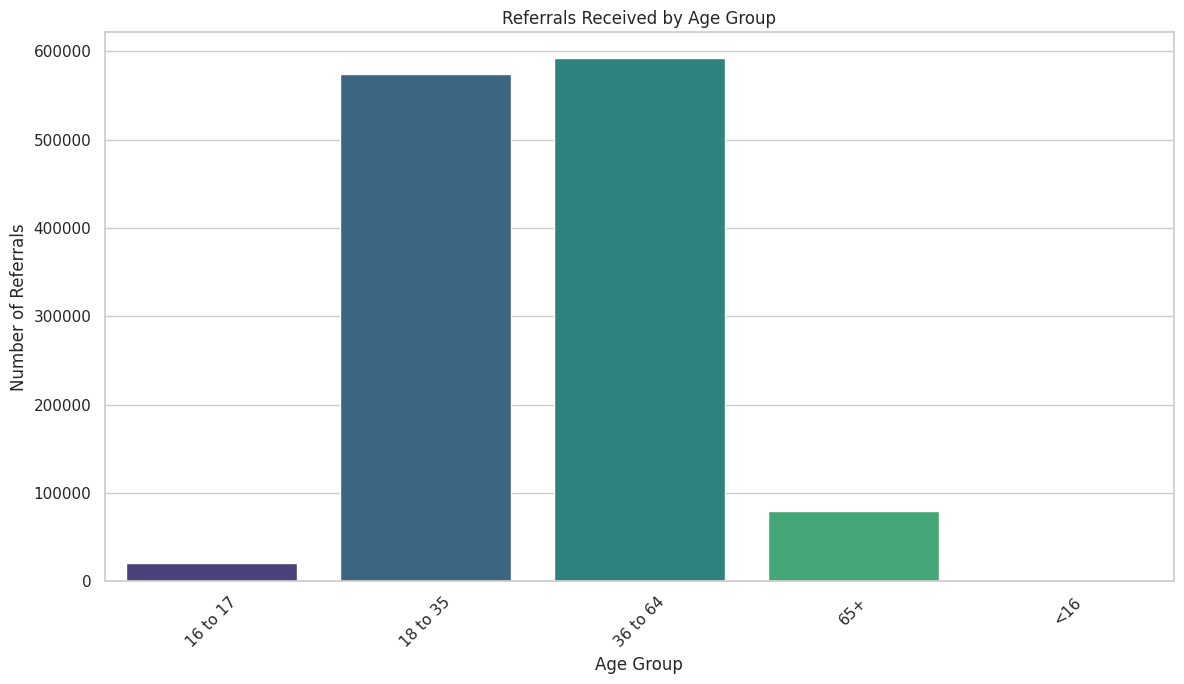

/tmp/ipykernel_7381/3051592054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_summary.reset_index(), x="Age Group", y="Referrals Received(%)", palette="viridis")


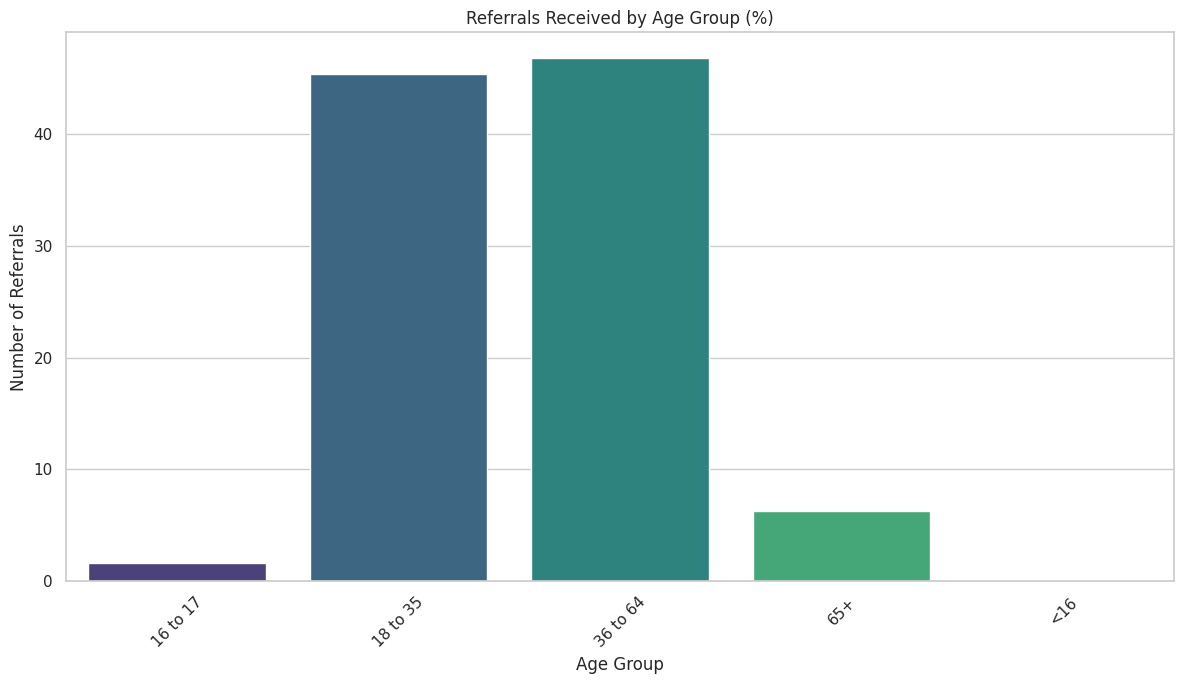

In [7]:
#Referrals by Age Group
plt.figure()
sns.barplot(data=age_summary.reset_index(), x="Age Group", y="Referrals Received", palette="viridis")
plt.title("Referrals Received by Age Group")
plt.ylabel("Number of Referrals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Referrals by Age Group - Percentage
plt.figure()
sns.barplot(data=age_summary.reset_index(), x="Age Group", y="Referrals Received(%)", palette="viridis")
plt.title("Referrals Received by Age Group (%)")
plt.ylabel("Number of Referrals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_7381/1111255570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_summary.reset_index(), x="Age Group", y="Entry_Rate", palette="viridis")


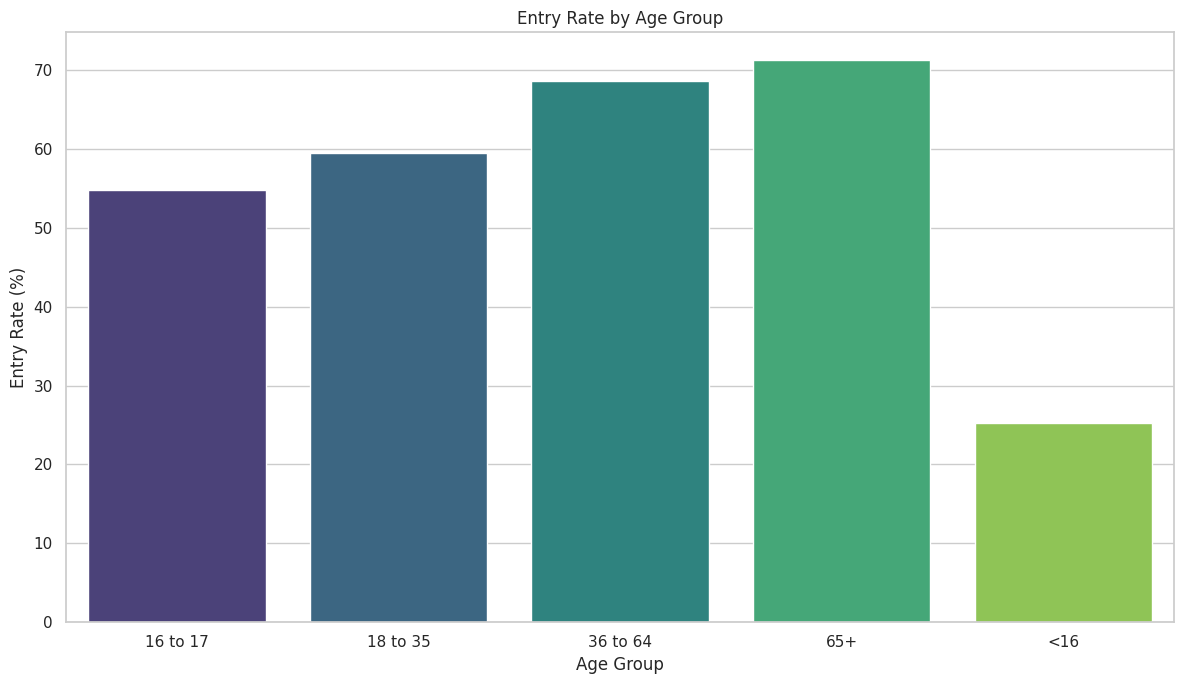

In [8]:
plt.figure()
sns.barplot(data=age_summary.reset_index(), x="Age Group", y="Entry_Rate", palette="viridis")
plt.title("Entry Rate by Age Group")
plt.ylabel("Entry Rate (%)")
plt.tight_layout()
plt.show()

/tmp/ipykernel_7381/2422233260.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_summary.reset_index(), x="Age Group", y="Completion_Rate", palette="magma")


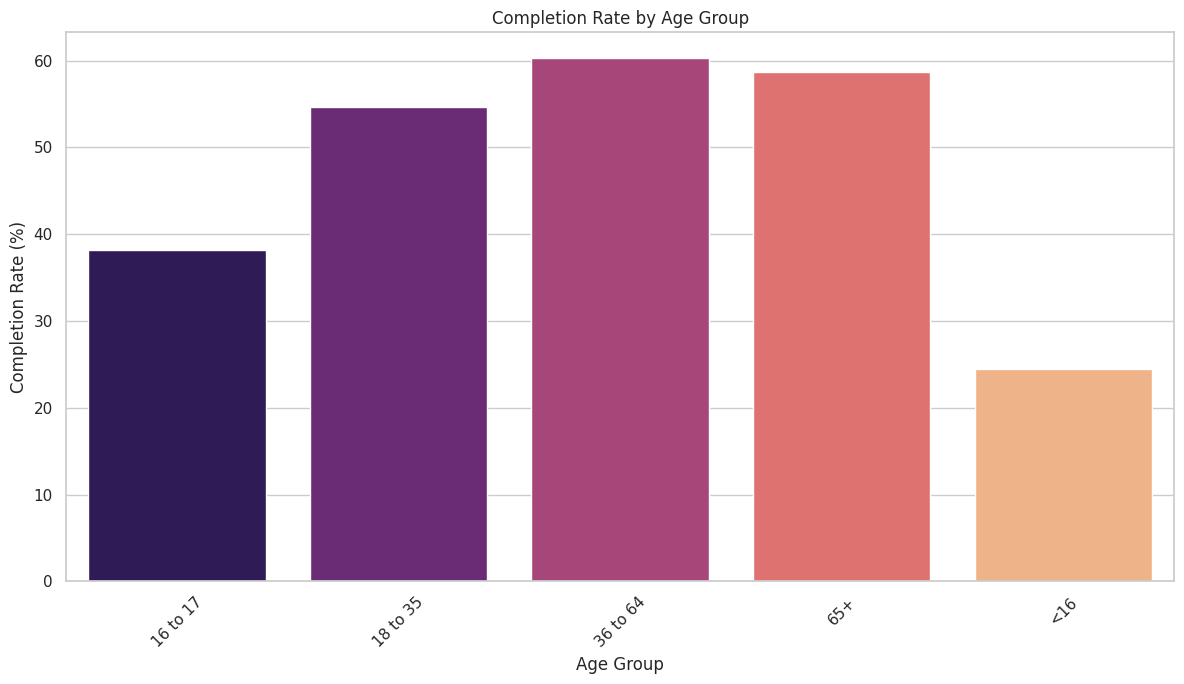

In [9]:
plt.figure()
sns.barplot(data=age_summary.reset_index(), x="Age Group", y="Completion_Rate", palette="magma")
plt.title("Completion Rate by Age Group")
plt.ylabel("Completion Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Sum across all Age Groups for each gender
male_received = df["Referrals Received - Male"].sum()
male_entered  = df["Entered Treatment - Male"].sum()
male_completed = df["Completing Treatment - Male"].sum()

female_received = df["Referrals Received - Female"].sum()
female_entered  = df["Entered Treatment -Female"].sum()
female_completed = df["Completing Treatment - Female"].sum()

# Compute rates
male_entry_rate = male_entered / male_received * 100
male_completion_rate = male_completed / male_entered * 100

female_entry_rate = female_entered / female_received * 100
female_completion_rate = female_completed / female_entered * 100

print("---- Gender Summary ----")
print(f"Male referrals received: {male_received:,}")
print(f"Female referrals received: {female_received:,}\n")

print(f"Male share of referrals: {(male_received / (male_received + female_received) * 100):.2f}%")
print(f"Female share of referrals: {(female_received / (male_received + female_received) * 100):.2f}%\n")

print(f"Male entry rate: {male_entry_rate:.2f}%")
print(f"Female entry rate: {female_entry_rate:.2f}%\n")

print(f"Male completion rate: {male_completion_rate:.2f}%")
print(f"Female completion rate: {female_completion_rate:.2f}%")

---- Gender Summary ----
Male referrals received: 453,264
Female referrals received: 794,937

Male share of referrals: 36.31%
Female share of referrals: 63.69%

Male entry rate: 63.18%
Female entry rate: 65.81%

Male completion rate: 56.96%
Female completion rate: 58.01%


In [13]:
gender_df = pd.DataFrame({
    "Gender": ["Male", "Female"],
    "Referrals Received": [male_received, female_received],
    "Entered Treatment": [male_entered, female_entered],
    "Completed Treatment": [male_completed, female_completed],
    "Entry Rate (%)": [male_entry_rate, female_entry_rate],
    "Completion Rate (%)": [male_completion_rate, female_completion_rate]
})

gender_df.head()

,Gender,Referrals Received,Entered Treatment,Completed Treatment,Entry Rate (%),Completion Rate (%)
0,Male,453264,286387,163115,63.183266,56.956147
1,Female,794937,523129,303467,65.807605,58.009975


/tmp/ipykernel_7381/3357902101.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_df, x="Gender", y="Entry Rate (%)", palette="Blues_d")


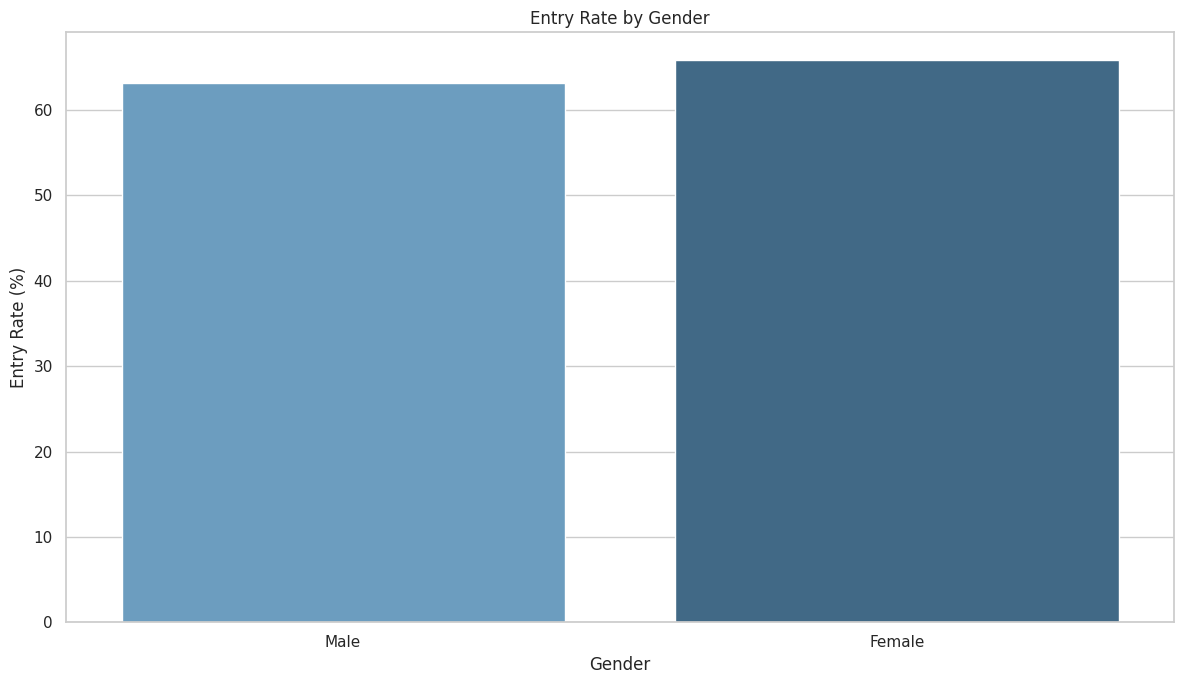

In [16]:
# Plot entry rate by gender
plt.figure()
sns.barplot(data=gender_df, x="Gender", y="Entry Rate (%)", palette="Blues_d")
plt.title("Entry Rate by Gender")
plt.ylabel("Entry Rate (%)")
plt.tight_layout()
plt.show()

/tmp/ipykernel_7381/3092731413.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_df, x="Gender", y="Completion Rate (%)", palette="Purples_d")


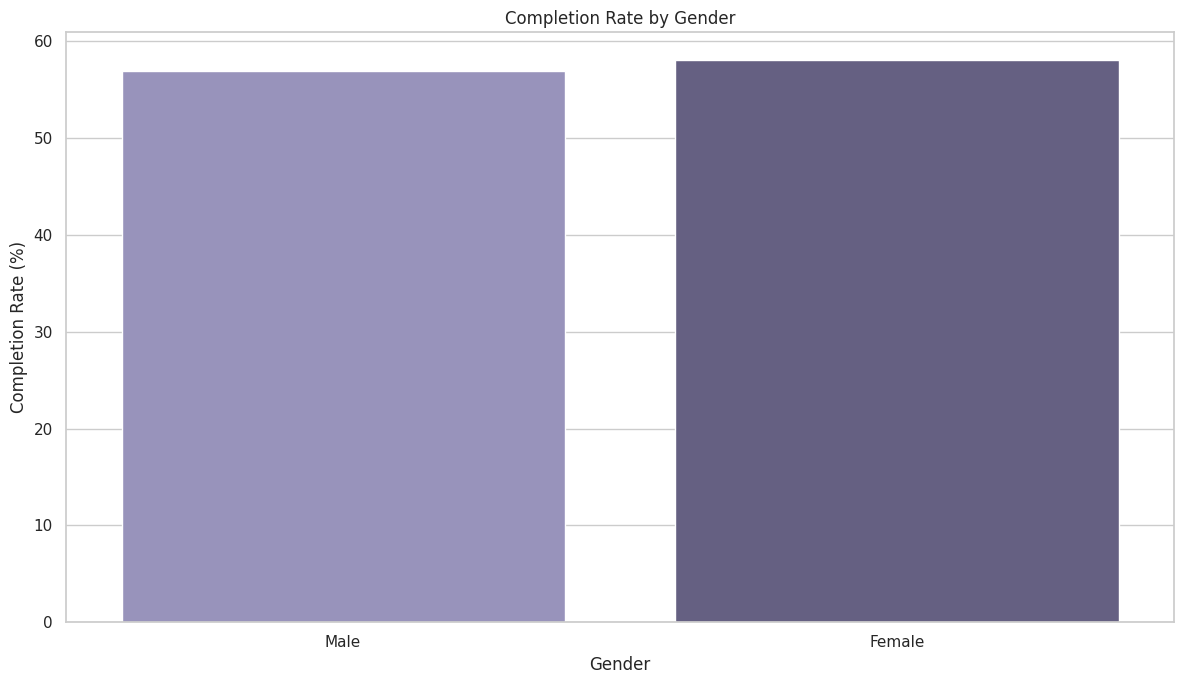

In [17]:
# Plot completion rate by gender
plt.figure()
sns.barplot(data=gender_df, x="Gender", y="Completion Rate (%)", palette="Purples_d")
plt.title("Completion Rate by Gender")
plt.ylabel("Completion Rate (%)")
plt.tight_layout()
plt.show()

In [18]:
# -------------------------------------------------------------------
# GENDER DISTRIBUTION BY AGE GROUP – COMPLETE ANALYSIS + PLOTS
# -------------------------------------------------------------------

# 1. Auto-detect male/female columns (robust against naming differences)
male_received_col  = [c for c in df.columns if "male" in c.lower() and "received" in c.lower()][0]
male_entered_col   = [c for c in df.columns if "male" in c.lower() and "enter" in c.lower()][0]
male_completed_col = [c for c in df.columns if "male" in c.lower() and "complet" in c.lower()][0]

female_received_col  = [c for c in df.columns if "female" in c.lower() and "received" in c.lower()][0]
female_entered_col   = [c for c in df.columns if "female" in c.lower() and "enter" in c.lower()][0]
female_completed_col = [c for c in df.columns if "female" in c.lower() and "complet" in c.lower()][0]


# -------------------------------------------------------------------
# 2. NATIONAL GENDER TOTALS
# -------------------------------------------------------------------

male_received = df[male_received_col].sum()
male_entered  = df[male_entered_col].sum()
male_completed = df[male_completed_col].sum()

female_received = df[female_received_col].sum()
female_entered  = df[female_entered_col].sum()
female_completed = df[female_completed_col].sum()

male_entry_rate = male_entered / male_received * 100
male_completion_rate = male_completed / male_entered * 100

female_entry_rate = female_entered / female_received * 100
female_completion_rate = female_completed / female_entered * 100

print("---- Gender Summary ----")
print(f"Male referrals received: {male_received:,}")
print(f"Female referrals received: {female_received:,}")
print(f"Male share of referrals: {(male_received / (male_received + female_received) * 100):.2f}%")
print(f"Female share of referrals: {(female_received / (male_received + female_received) * 100):.2f}%\n")
print(f"Male entry rate: {male_entry_rate:.2f}%")
print(f"Female entry rate: {female_entry_rate:.2f}%\n")
print(f"Male completion rate: {male_completion_rate:.2f}%")
print(f"Female completion rate: {female_completion_rate:.2f}%\n")


# -------------------------------------------------------------------
# 3. AGE SUMMARY
# -------------------------------------------------------------------

age_summary = df.groupby("Age Group").agg({
    "Referrals Received": "sum",
    "Entered Treatment": "sum",
    "Completing Treatment": "sum"
})

age_summary["Entry_Rate"] = age_summary["Entered Treatment"] / age_summary["Referrals Received"] * 100
age_summary["Completion_Rate"] = age_summary["Completing Treatment"] / age_summary["Entered Treatment"] * 100
age_summary["Referrals Received(%)"] = age_summary["Referrals Received"] / national_received * 100

age_summary


# -------------------------------------------------------------------
# 4. GENDER DISTRIBUTION WITHIN AGE GROUPS
# -------------------------------------------------------------------

# For each age group, sum male/female referrals:
age_gender = df.groupby("Age Group").agg({
    male_received_col: "sum",
    female_received_col: "sum",
    male_entered_col: "sum",
    female_entered_col: "sum",
    male_completed_col: "sum",
    female_completed_col: "sum"
})

# Compute rates within each age group
age_gender["Male Entry Rate"] = age_gender[male_entered_col] / age_gender[male_received_col] * 100
age_gender["Female Entry Rate"] = age_gender[female_entered_col] / age_gender[female_received_col] * 100

age_gender["Male Completion Rate"] = age_gender[male_completed_col] / age_gender[male_entered_col] * 100
age_gender["Female Completion Rate"] = age_gender[female_completed_col] / age_gender[female_entered_col] * 100

age_gender


---- Gender Summary ----
Male referrals received: 453,264
Female referrals received: 794,937
Male share of referrals: 36.31%
Female share of referrals: 63.69%

Male entry rate: 63.18%
Female entry rate: 65.81%

Male completion rate: 56.96%
Female completion rate: 58.01%



,Referrals Received - Male,Referrals Received - Female,Entered Treatment - Male,Entered Treatment -Female,Completing Treatment - Male,Completing Treatment - Female,Male Entry Rate,Female Entry Rate,Male Completion Rate,Female Completion Rate
Age Group,,,,,,,,,,
16 to 17,6039,14173,3215,7915,1161,3107,53.237291,55.845622,36.111975,39.254580
18 to 35,199281,365576,114100,224615,60758,124857,57.255835,61.441397,53.249781,55.587116
36 to 64,222615,361265,151095,252126,90654,152942,67.872785,69.789767,59.998014,60.660939
65+,25147,53531,17919,38361,10528,22535,71.257009,71.661280,58.753279,58.744558
<16,182,392,58,112,14,26,31.868132,28.571429,24.137931,23.214286


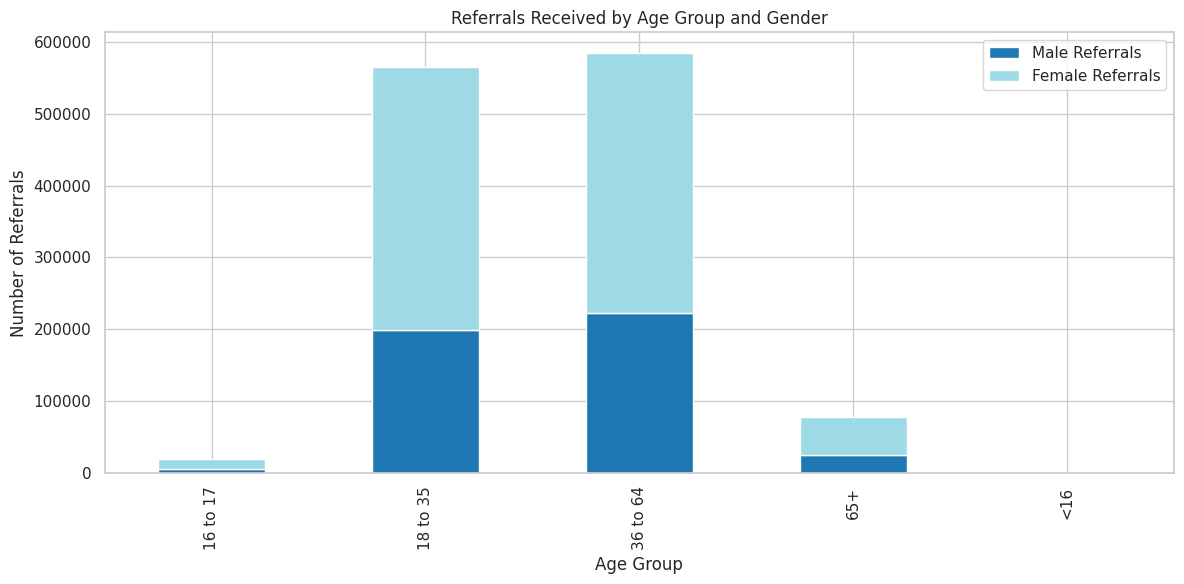

In [19]:
# Stacked bar showing gender distribution across age groups
age_gender_plot = age_gender[[male_received_col, female_received_col]].copy()
age_gender_plot.columns = ["Male Referrals", "Female Referrals"]

age_gender_plot.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Referrals Received by Age Group and Gender")
plt.ylabel("Number of Referrals")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()

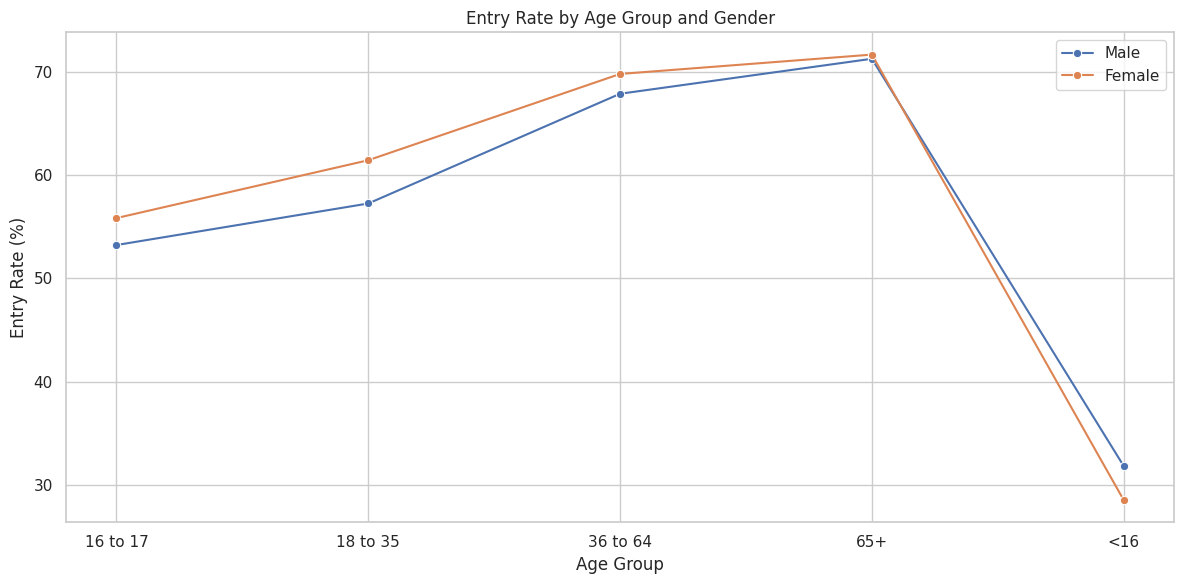

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=age_gender.reset_index(),
    x="Age Group", y="Male Entry Rate", marker="o", label="Male"
)
sns.lineplot(
    data=age_gender.reset_index(),
    x="Age Group", y="Female Entry Rate", marker="o", label="Female"
)
plt.title("Entry Rate by Age Group and Gender")
plt.ylabel("Entry Rate (%)")
plt.tight_layout()
plt.show()

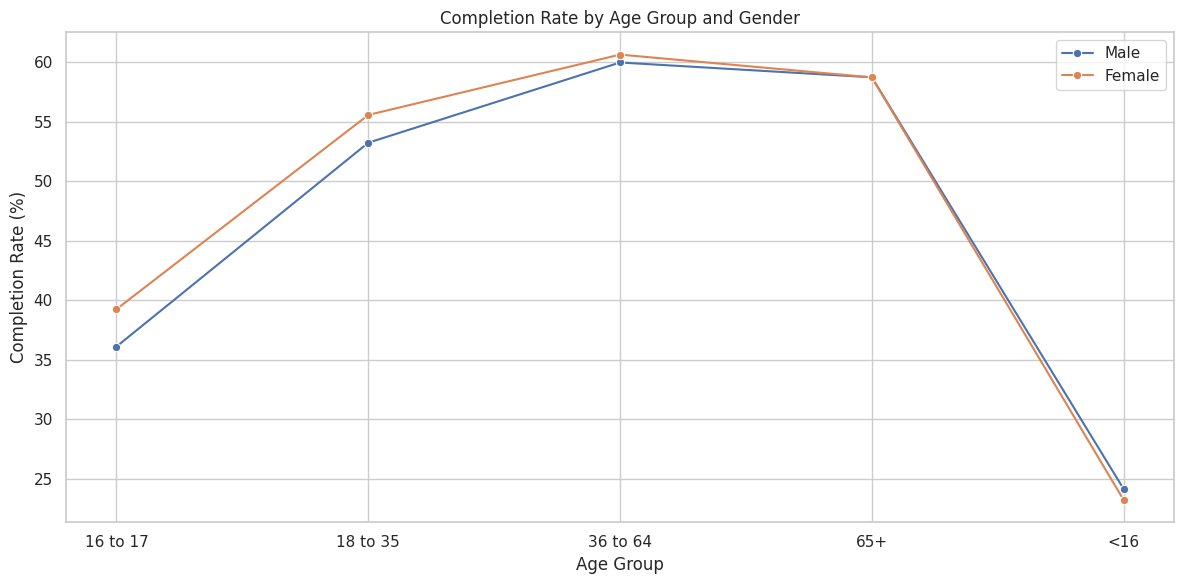

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=age_gender.reset_index(),
    x="Age Group", y="Male Completion Rate", marker="o", label="Male"
)
sns.lineplot(
    data=age_gender.reset_index(),
    x="Age Group", y="Female Completion Rate", marker="o", label="Female"
)
plt.title("Completion Rate by Age Group and Gender")
plt.ylabel("Completion Rate (%)")
plt.tight_layout()
plt.show()